<a href="https://colab.research.google.com/github/murad1710/my-colab-notebooks/blob/main/inflasiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


try:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='latin-1')



In [ ]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1.0,2014.0,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2.0,2014.0,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3.0,2014.0,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4.0,2014.0,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5.0,2014.0,50.0,WFP


In [ ]:
df.isna().sum()

,0
adm0_id,0
adm0_name,0
adm1_id,0
adm1_name,503
mkt_id,0
mkt_name,0
cm_id,0
cm_name,0
cur_id,0
cur_name,0


In [ ]:
df.dtypes

,0
adm0_id,int64
adm0_name,object
adm1_id,int64
adm1_name,object
mkt_id,int64
mkt_name,object
cm_id,int64
cm_name,object
cur_id,int64
cur_name,object


In [ ]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,29716.000000,29716.000000,29716.000000,29716.000000,29716.000000,29716.000000,29716.000000,29715.000000,29715.000000,2.971500e+04
mean,22.412337,15315.122358,561.912976,137.842980,44.815083,14.989366,11.011172,6.471344,2011.894229,1.224652e+04
std,14.516158,21404.307762,578.309262,108.534481,24.018255,0.102573,14.618068,3.419319,4.896666,1.607909e+05
min,1.000000,0.000000,112.000000,51.000000,25.000000,14.000000,5.000000,1.000000,1992.000000,2.400000e-01
25%,13.000000,458.000000,135.000000,65.000000,26.000000,15.000000,5.000000,3.000000,2010.000000,3.200000e+01
50%,23.000000,579.000000,307.000000,92.000000,37.000000,15.000000,5.000000,6.000000,2014.000000,1.315991e+02
75%,33.000000,40285.000000,643.000000,145.000000,46.000000,15.000000,5.000000,9.000000,2015.000000,3.050000e+02
max,42.000000,99878.000000,1903.000000,465.000000,91.000000,15.000000,86.000000,12.000000,2017.000000,5.833333e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29716 entries, 0 to 29715
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             29716 non-null  int64  
 1   adm0_name           29716 non-null  object 
 2   adm1_id             29716 non-null  int64  
 3   adm1_name           29213 non-null  object 
 4   mkt_id              29716 non-null  int64  
 5   mkt_name            29716 non-null  object 
 6   cm_id               29716 non-null  int64  
 7   cm_name             29716 non-null  object 
 8   cur_id              29716 non-null  int64  
 9   cur_name            29716 non-null  object 
 10  pt_id               29716 non-null  int64  
 11  pt_name             29716 non-null  object 
 12  um_id               29716 non-null  int64  
 13  um_name             29715 non-null  object 
 14  mp_month            29715 non-null  float64
 15  mp_year             29715 non-null  float64
 16  mp_p

In [ ]:
df = df[df['adm0_name'] == 'Azerbaijan']

In [ ]:
df['date'] = pd.to_datetime(df['mp_year'].astype(int).astype(str) + '-' + df['mp_month'].astype(int).astype(str))

In [ ]:
df.drop(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
         'cm_id', 'cur_id', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_commoditysource'], axis=1, inplace=True)


In [ ]:
df.sort_values('date', inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['mp_year', 'mp_month']]
y = df['mp_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

Mean Squared Error: 0.035
R2 Score: -0.094


In [ ]:
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import  ColumnTransformer
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import  ColumnTransformer
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns


cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'constant', fill_value = "Missing")),
    ('one_hot', OneHotEncoder(handle_unknown='ignore',sparse_output = False ))
])

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy  = 'median')),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
('cat', cat_pipeline, cat_features),
('num', num_pipeline, num_features)
], remainder = 'passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

col_names = transformer.get_feature_names_out()


X_train_transformed_df = pd.DataFrame(transformer.fit_transform(X_train) ,columns = col_names)
X_test_transformed_df = pd.DataFrame(transformer.transform(X_test), columns = col_names)







rfc = RandomForestRegressor(random_state = 42, n_jobs = -1)
rfc.fit(X_train_transformed_df, y_train)
print(f'Train score:{rfc.score(X_train_transformed_df, y_train)},\n Test score:{rfc.score(X_test_transformed_df, y_test)}')

Train score:0.13521347245534865,
 Test score:-0.016177980297020333


In [ ]:
df.shape

(125, 6)

In [ ]:
df['cm_name'].unique()


array(['Wheat flour', 'Sugar', 'Potatoes', 'Milk (non-pasteurized)'],
      dtype=object)

In [ ]:
df['cur_name'].unique()

array(['AZN'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

products = df['cm_name'].unique()

for product in products:
    print(f"Məhsul: {product}")

    data_product = df[df['cm_name'] == product]


    X = data_product[['mp_year', 'mp_month']]
    y = data_product['mp_price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.3f}")
    print(f"  R2: {r2:.3f}\n")


Məhsul: Wheat flour
  MSE: 0.001
  R2: -2.863

Məhsul: Sugar
  MSE: 0.047
  R2: -6.279

Məhsul: Potatoes
  MSE: 0.004
  R2: 0.023

Məhsul: Milk (non-pasteurized)
  MSE: 0.053
  R2: -16.925



In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['mp_month'].apply(get_season)


In [ ]:
df['lag_price'] = df.groupby('cm_name')['mp_price'].shift(1)


In [ ]:
df = pd.get_dummies(df, columns=['season', 'cm_name'])


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


try:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='latin-1')


df = df[df['adm0_name'] == 'Azerbaijan'].copy()

df['date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str))


df.drop(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
         'cm_id', 'cur_id', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_commoditysource'], axis=1, inplace=True)


df.sort_values(by=['cm_name', 'date'], inplace=True)


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['mp_month'].apply(get_season)
df['lag_price'] = df.groupby('cm_name')['mp_price'].shift(1)
df = df.dropna()
df_encoded = pd.get_dummies(df, columns=['cm_name', 'season'])

feature_cols = ['mp_year', 'mp_month', 'lag_price'] + \
               [col for col in df_encoded.columns if 'cm_name_' in col or 'season_' in col]

X = df_encoded[feature_cols]
y = df_encoded['mp_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

RMSE: 0.0453
R²: 0.6611


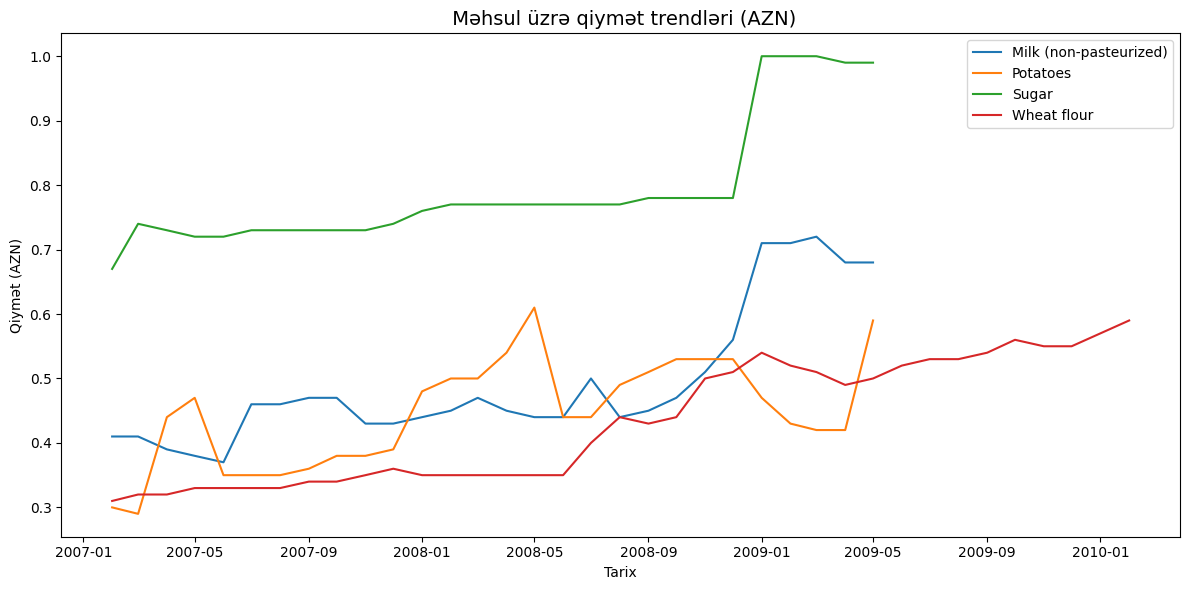

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for product in df['cm_name'].unique():
    subset = df[df['cm_name'] == product]
    plt.plot(subset['date'], subset['mp_price'], label=product)
plt.title(' Məhsul üzrə qiymət trendləri (AZN)', fontsize=14)
plt.xlabel('Tarix')
plt.ylabel('Qiymət (AZN)')
plt.legend()
plt.tight_layout()
plt.show();


/tmp/ipython-input-28-141195362.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='season', y='mp_price', estimator='mean', ci=None, palette='Blues_d')
/tmp/ipython-input-28-141195362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='mp_price', estimator='mean', ci=None, palette='Blues_d')


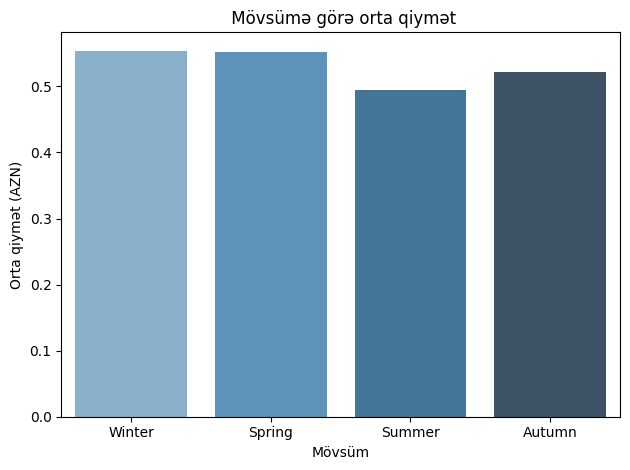

In [ ]:
import seaborn as sns
sns.barplot(data=df, x='season', y='mp_price', estimator='mean', ci=None, palette='Blues_d')
plt.title(' Mövsümə görə orta qiymət')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Mövsüm')
plt.tight_layout()
plt.show();


/tmp/ipython-input-29-3448735359.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cm_name', y='mp_price', estimator='mean', ci=None, palette='Greens_d')
/tmp/ipython-input-29-3448735359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cm_name', y='mp_price', estimator='mean', ci=None, palette='Greens_d')


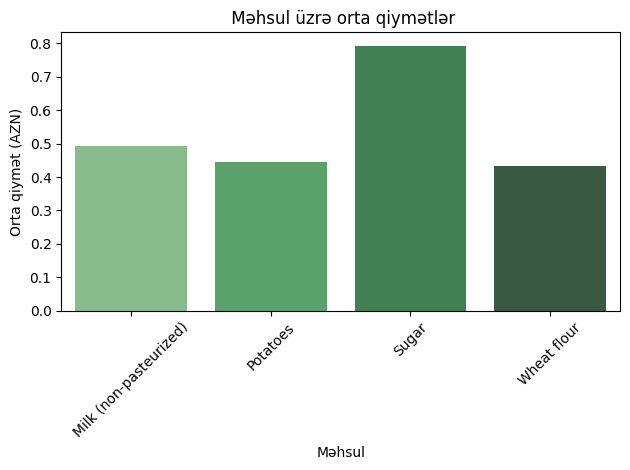

In [ ]:
sns.barplot(data=df, x='cm_name', y='mp_price', estimator='mean', ci=None, palette='Greens_d')
plt.title(' Məhsul üzrə orta qiymətlər')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Məhsul')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


/tmp/ipython-input-30-1357042534.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='mp_price', palette='Pastel1')


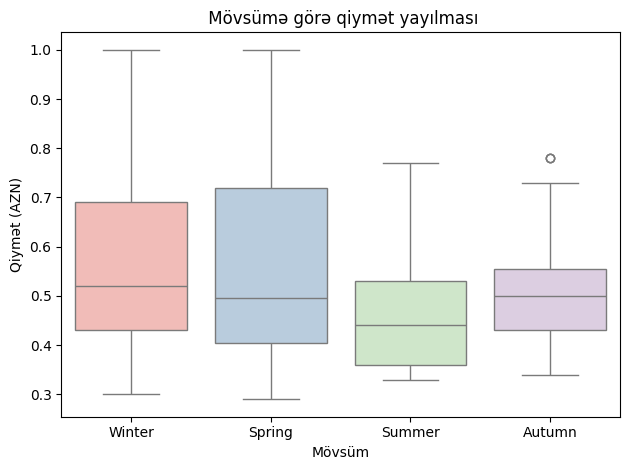

In [ ]:
sns.boxplot(data=df, x='season', y='mp_price', palette='Pastel1')
plt.title(' Mövsümə görə qiymət yayılması')
plt.ylabel('Qiymət (AZN)')
plt.xlabel('Mövsüm')
plt.tight_layout()
plt.show();


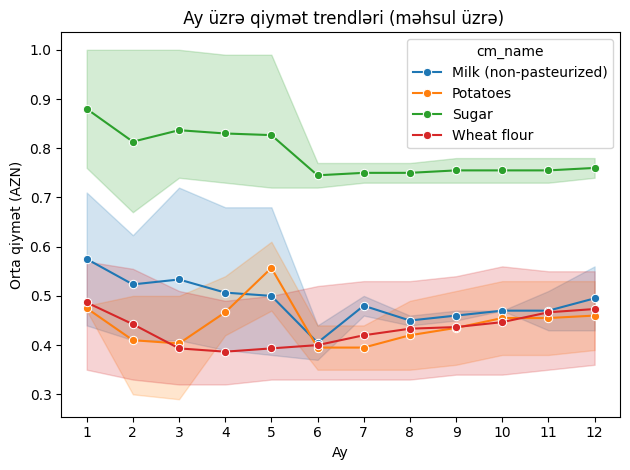

In [ ]:
sns.lineplot(data=df, x='mp_month', y='mp_price', hue='cm_name', marker='o', palette='tab10')
plt.title(' Ay üzrə qiymət trendləri (məhsul üzrə)')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Ay')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


In [ ]:
# İllik ortalama qiymət
annual_avg = df.groupby(["cm_name", "mp_year"])["mp_price"].mean().reset_index()

# Faizlə dəyişiklik
annual_avg["price_change_%"] = annual_avg.groupby("cm_name")["mp_price"].pct_change() * 100

annual_avg.dropna().head(10)


,cm_name,mp_year,mp_price,price_change_%
1,Milk (non-pasteurized),2008,0.468333,10.078348
2,Milk (non-pasteurized),2009,0.700000,49.466192
4,Potatoes,2008,0.508333,37.725780
5,Potatoes,2009,0.466000,-8.327869
7,Sugar,2008,0.772500,6.618570
8,Sugar,2009,0.996000,28.932039
10,Wheat flour,2008,0.401667,20.719490
11,Wheat flour,2009,0.528333,31.535270
12,Wheat flour,2010,0.580000,9.779180


In [ ]:
wheat = df[df["cm_name"] == "Wheat flour"]


wheat_ts = wheat.groupby("date")["mp_price"].mean().asfreq("MS")
wheat_ts = wheat_ts.fillna(method="ffill")


/tmp/ipython-input-33-3755174914.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wheat_ts = wheat_ts.fillna(method="ffill")


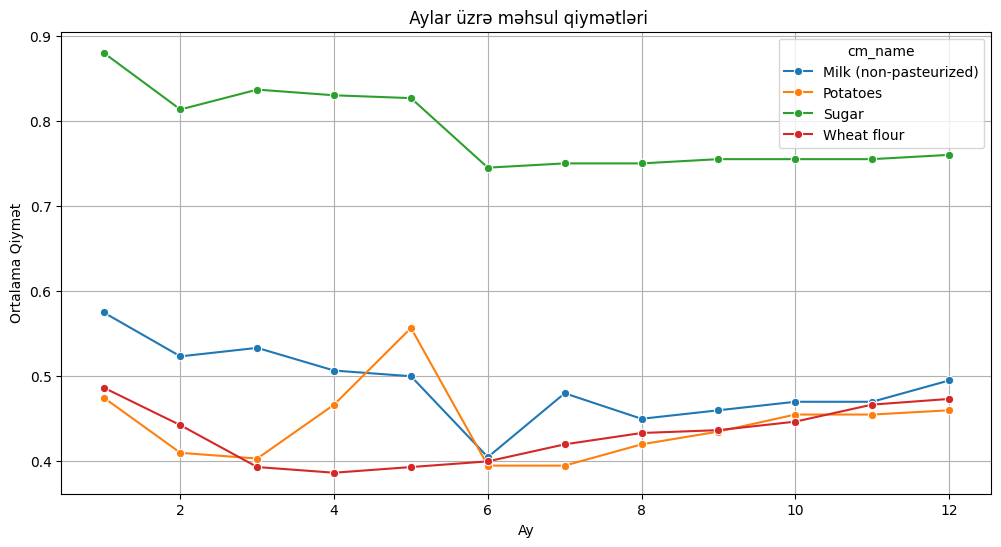

In [ ]:

seasonality = df.groupby(["cm_name", "mp_month"])["mp_price"].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonality, x="mp_month", y="mp_price", hue="cm_name", marker="o")
plt.title(" Aylar üzrə məhsul qiymətləri")
plt.xlabel("Ay")
plt.ylabel("Ortalama Qiymət")
plt.grid(True)
plt.show()


In [ ]:
df = df.dropna(subset=['mp_price', 'mp_year', 'cm_name'])

In [ ]:
# missing_base = df[df['base_price_year'].isna()]['cm_name'].unique()
# print("Commodities missing 2019 data:", missing_base)

In [ ]:
df['mp_year'] = pd.to_numeric(df['mp_year'], errors='coerce')
df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values='mp_price',
    index='cm_name',
    columns='mp_year',
    aggfunc='mean'
)
print(pivot_table)

mp_year                     2007      2008      2009  2010
cm_name                                                   
Milk (non-pasteurized)  0.425455  0.468333  0.700000   NaN
Potatoes                0.369091  0.508333  0.466000   NaN
Sugar                   0.724545  0.772500  0.996000   NaN
Wheat flour             0.332727  0.401667  0.528333  0.58


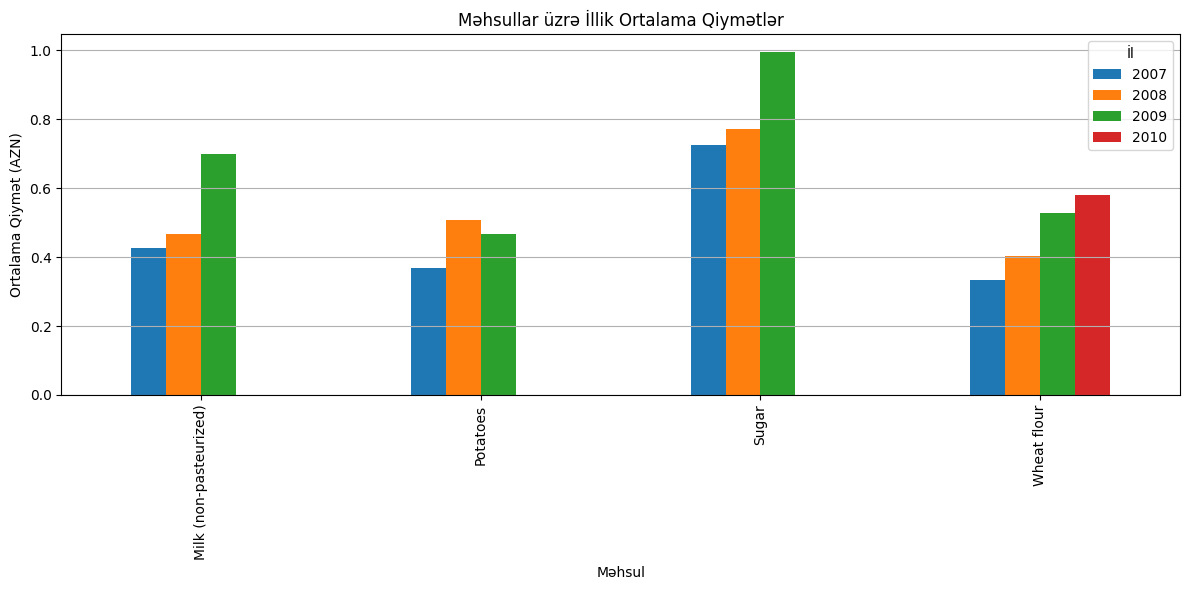

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot cədvəl
pivot_table = pd.pivot_table(
    df,
    values='mp_price',
    index='cm_name',
    columns='mp_year',
    aggfunc='mean'
)

# Barplot
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title("Məhsullar üzrə İllik Ortalama Qiymətlər")
plt.xlabel("Məhsul")
plt.ylabel("Ortalama Qiymət (AZN)")
plt.legend(title="İl")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


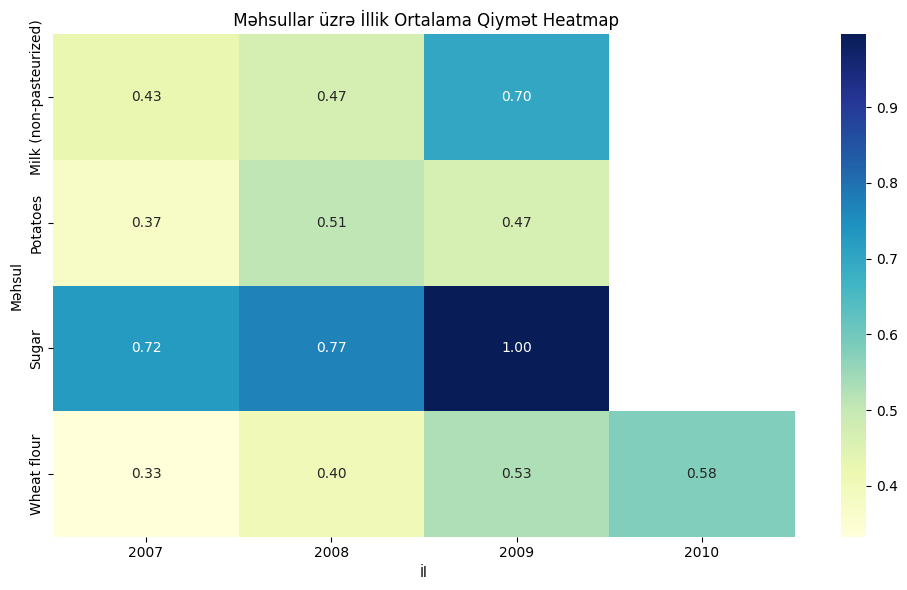

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(" Məhsullar üzrə İllik Ortalama Qiymət Heatmap")
plt.xlabel("İl")
plt.ylabel("Məhsul")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_clf = RandomForestRegressor(random_state = 42)
forest_clf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
forest_clf.score(X_train, y_train)

0.9872168764310547

In [ ]:

forest_clf.score(X_test, y_test)

0.6611098607212829

In [ ]:
df

,cm_name,cur_name,mp_month,mp_year,mp_price,date,season,lag_price
12635,Milk (non-pasteurized),AZN,2,2007,0.41,2007-02-01,Winter,0.40
12636,Milk (non-pasteurized),AZN,3,2007,0.41,2007-03-01,Spring,0.41
12637,Milk (non-pasteurized),AZN,4,2007,0.39,2007-04-01,Spring,0.41
12638,Milk (non-pasteurized),AZN,5,2007,0.38,2007-05-01,Spring,0.39
12639,Milk (non-pasteurized),AZN,6,2007,0.37,2007-06-01,Summer,0.38
...,...,...,...,...,...,...,...,...
12571,Wheat flour,AZN,10,2009,0.56,2009-10-01,Autumn,0.54
12572,Wheat flour,AZN,11,2009,0.55,2009-11-01,Autumn,0.56
12573,Wheat flour,AZN,12,2009,0.55,2009-12-01,Winter,0.55
12574,Wheat flour,AZN,1,2010,0.57,2010-01-01,Winter,0.55


In [ ]:
df.isna().sum()

,0
cm_name,0
cur_name,0
mp_month,0
mp_year,0
mp_price,0
date,0
season,0
lag_price,0


In [ ]:

import plotly.express as px

try:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='latin-1')





df["date"] = pd.to_datetime(df["mp_year"].astype(str) + "-" + df["mp_month"].astype(str))


country_year_avg = df.groupby(["adm0_name", "mp_year"])["mp_price"].mean().reset_index()

country_year_avg["price_diff"] = country_year_avg.groupby("adm0_name")["mp_price"].diff()


inflation_summary = country_year_avg.groupby("adm0_name")["price_diff"].mean().reset_index()
inflation_summary.columns = ["Country", "Avg_Inflation"]
inflation_summary = inflation_summary.dropna()


fig = px.choropleth(
    inflation_summary,
    locations="Country",
    locationmode="country names",
    color="Avg_Inflation",
    color_continuous_scale="Reds",
    title="Ölkələr üzrə Orta İnflyasiya Dərəcəsi "
)

fig.update_layout(margin=dict(l=0, r=0, t=40, b=0))
fig.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


df["date"] = pd.to_datetime(df["mp_year"].astype(str) + "-" + df["mp_month"].astype(str))


df = df[df["adm0_name"] == "Azerbaijan"]


df = df.dropna(subset=["mp_price", "cm_name"])
df = df[df["mp_price"] > 0]


df = df.sort_values(by=["cm_name", "date"])
df["lag_1"] = df.groupby("cm_name")["mp_price"].shift(1)
df["lag_2"] = df.groupby("cm_name")["mp_price"].shift(2)
df["lag_3"] = df.groupby("cm_name")["mp_price"].shift(3)
df["rolling_mean_3"] = df.groupby("cm_name")["mp_price"].rolling(window=3).mean().reset_index(0, drop=True)
df["price_diff"] = df["mp_price"].diff()

print(f"Shape before filling NaNs: {df.shape}")


for col in ['lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'price_diff']:
    df[col] = df.groupby('cm_name')[col].bfill()


print(f"Shape after filling NaNs: {df.shape}")


if df.shape[0] == 0:
    print("DataFrame yoxdur.")
else:

    df_encoded = pd.get_dummies(df, columns=['cm_name', 'cur_name', 'pt_name', 'um_name'])
    print(f"Shape after one-hot encoding: {df_encoded.shape}")

    feature_cols = ['mp_year', 'mp_month', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'price_diff']
    feature_cols += [col for col in df_encoded.columns if 'cm_name_' in col or 'season_' in col]

    X = df_encoded[feature_cols]
    y = df_encoded['mp_price']
    print(f"Shape of X before split: {X.shape}")
    print(f"Shape of y before split: {y.shape}")



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)


    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42) # Removed objective parameter
    gbr.fit(X_train, y_train)
    gbr_pred = gbr.predict(X_test)


    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)


    ensemble_pred = (rf_pred + gbr_pred + lr_pred) / 3


    mse = mean_squared_error(y_test, ensemble_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_pred)

    print(f" Ensemble Model Nəticələri:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

Shape before filling NaNs: (125, 24)
Shape after filling NaNs: (125, 24)
Shape after one-hot encoding: (125, 28)
Shape of X before split: (125, 11)
Shape of y before split: (125,)
✅ Ensemble Model Nəticələri:
RMSE: 0.0135
R²: 0.9914


In [ ]:
import pandas as pd



try:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/wfp_market_food_prices.csv', encoding='latin-1')


# Tarix formatı
df["date"] = pd.to_datetime(df["mp_year"].astype(str) + "-" + df["mp_month"].astype(str))

# Orta qiymət (ölkə + il üzrə)
grouped = df.groupby(["adm0_name", "mp_year"])["mp_price"].mean().reset_index()

# Qiymət fərqi (ilin əvvəlindən sonuna qədər)
grouped["price_diff"] = grouped.groupby("adm0_name")["mp_price"].diff()

# İllik artımın orta dəyəri ilə sıralama (ən çox artan il)
inflation_years = grouped.groupby(["adm0_name", "mp_year"])["price_diff"].mean().reset_index()
top_inflation = inflation_years.sort_values("price_diff", ascending=False).dropna().head(10)

print(" Ən çox inflyasiya müşahidə edilən ölkə/il kombinasiyaları:")
print(top_inflation)


🌍 Ən çox inflyasiya müşahidə edilən ölkə/il kombinasiyaları:
                       adm0_name  mp_year     price_diff
186                     Colombia     2012  434023.298088
1                    Afghanistan     2001  311121.050096
2                    Afghanistan     2002  138415.113873
799  United Republic of Tanzania     2011   27707.731902
800  United Republic of Tanzania     2012   25626.451211
796  United Republic of Tanzania     2008   24373.736327
805  United Republic of Tanzania     2017   22251.871651
803  United Republic of Tanzania     2015   20127.048965
398  Iran  (Islamic Republic of)     2013   17144.555556
189                     Colombia     2015   13522.195709


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Yalnız Azərbaycan üçün
azerbaijan = df[df["adm0_name"] == "Azerbaijan"].copy()

# Tarix, sort
azerbaijan = azerbaijan.sort_values("date")
azerbaijan["lag_1"] = azerbaijan.groupby("cm_name")["mp_price"].shift(1)
azerbaijan["rolling_mean"] = azerbaijan.groupby("cm_name")["mp_price"].rolling(3).mean().reset_index(0, drop=True)
azerbaijan["price_diff"] = azerbaijan["mp_price"].diff()
azerbaijan = azerbaijan.fillna(method="bfill")

# One-hot encoding
encoded = pd.get_dummies(azerbaijan[["cm_name", "cur_name", "pt_name"]])
X = pd.concat([azerbaijan[["lag_1", "rolling_mean", "price_diff"]], encoded], axis=1)
y = azerbaijan["mp_price"]

# Train-test bölünməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Gradient Boosting tətbiqi
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metriklər
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Gələcək qiymət proqnozu üçün model nəticələri:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


/tmp/ipython-input-49-91464684.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipython-input-49-91464684.py:14: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



🔮 Gələcək qiymət proqnozu üçün model nəticələri:
RMSE: 0.0537
R²: 0.9086


In [ ]:
if r2 > 0.9:
    print(" Model yüksək dəqiqliklə qiymətləri proqnozlaşdırır. Gələcəkdə qiymət artımı ehtimalı yüksəkdir.")
else:
    print(" Modelin dəqiqliyi aşağıdır. Daha çox data və ya daha güclü model istifadə edilməlidir.")


✅ Model yüksək dəqiqliklə qiymətləri proqnozlaşdırır. Gələcəkdə qiymət artımı ehtimalı yüksəkdir.
